# Earth temperature over time

Is global temperature rising? How much? This is a question of burning importance in today's world!

Data about global temperatures are available from several sources: NASA, the National Climatic Data Center (NCDC) and the University of East Anglia in the UK. Check out the [University Corporation for Atmospheric Research](https://www2.ucar.edu/climate/faq/how-much-has-global-temperature-risen-last-100-years) (UCAR) for an in-depth discussion.

The [NASA Goddard Space Flight Center](https://svs.gsfc.nasa.gov/cgi-bin/details.cgi?aid=3901) is one of our sources of global climate data. They produced this video showing a color map of the changing global surface **temperature anomalies** from 1880 to 2015.

The term [global temperature anomaly](https://www.ncdc.noaa.gov/monitoring-references/faq/anomalies.php) means the difference in temperature with respect to a reference value or a long-term average. It is a very useful way of looking at the problem and in many ways better than absolute temperature. For example, a winter month may be colder than average in Washington DC, and also in Miami, but the absolute temperatures will be different in both places.

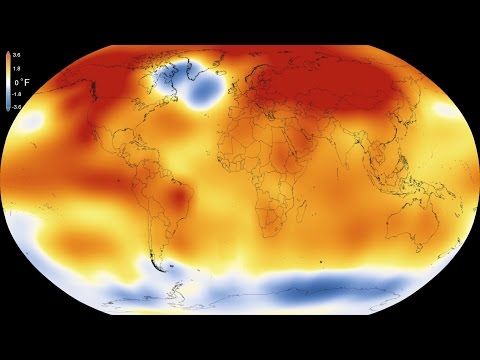

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('gGOzHVUQCw0')

How would we go about understanding the _trends_ from the data on global temperature?

The first step in analyzing unknown data is to generate some simple plots using **matplotlib**. We are going to look at the temperature-anomaly history, contained in a file, and make our first plot to explore this data. 

We are going to plot the data and then we'll fit a line to it to find a trend.

Let's get started!

## Step 1: Read a data file.

We took the data from the [NOAA](https://www.ncdc.noaa.gov/cag/) (National Oceanic and Atmospheric Administration) webpage. Feel free to play around with the webpage and analyze data on your own, but for now, let's make sure we're working with the same dataset.

We have some sample data in the folder called `data` on the tutorial repository: [Caminos](http://go.gwu.edu/caminos). 
The file contains the year on the first column, and averages of land temperature anomaly listed sequentially on the second column, from 1880 to 2016. We will read the file, then make an initial plot to see what it looks like.

Like in Lesson 2, we're assuming that you have all the files from this tutorial, or are working on the lesson after launching Binder. Executing the following cell will save the data in two arrays, one for each column.


In [2]:
import numpy

In [3]:
year, temp_anomaly = numpy.loadtxt(fname='data/land_global_temperature_anomaly-1880-2016.csv', delimiter=',', 
                              skiprows=5, unpack=True)

**Exercise** Inspect the data by printing `year` and `temp_anomaly`

In [4]:
print(year, temp_anomaly)

[1880. 1881. 1882. 1883. 1884. 1885. 1886. 1887. 1888. 1889. 1890. 1891.
 1892. 1893. 1894. 1895. 1896. 1897. 1898. 1899. 1900. 1901. 1902. 1903.
 1904. 1905. 1906. 1907. 1908. 1909. 1910. 1911. 1912. 1913. 1914. 1915.
 1916. 1917. 1918. 1919. 1920. 1921. 1922. 1923. 1924. 1925. 1926. 1927.
 1928. 1929. 1930. 1931. 1932. 1933. 1934. 1935. 1936. 1937. 1938. 1939.
 1940. 1941. 1942. 1943. 1944. 1945. 1946. 1947. 1948. 1949. 1950. 1951.
 1952. 1953. 1954. 1955. 1956. 1957. 1958. 1959. 1960. 1961. 1962. 1963.
 1964. 1965. 1966. 1967. 1968. 1969. 1970. 1971. 1972. 1973. 1974. 1975.
 1976. 1977. 1978. 1979. 1980. 1981. 1982. 1983. 1984. 1985. 1986. 1987.
 1988. 1989. 1990. 1991. 1992. 1993. 1994. 1995. 1996. 1997. 1998. 1999.
 2000. 2001. 2002. 2003. 2004. 2005. 2006. 2007. 2008. 2009. 2010. 2011.
 2012. 2013. 2014. 2015. 2016.] [-0.47 -0.45 -0.41 -0.6  -0.6  -0.52 -0.48 -0.47 -0.46 -0.31 -0.49 -0.55
 -0.52 -0.56 -0.35 -0.4  -0.27 -0.29 -0.37 -0.18 -0.13 -0.09 -0.33 -0.39
 -0.46 -0.42 -0.2  

## Step 2: Plot the data.

Let's first load our plotting library: the `pyplot` module of Matplotlib. To get the plots inside the notebook (rather than as popups), we use a special "magic" command, `%matplotlib inline`:

In [5]:
from matplotlib import pyplot
%matplotlib inline

You can add a semicolon at the end of the plotting command to avoid that stuff that appeared on top of the figure, that `Out[x]: [< ...>]` ugliness. Try it.

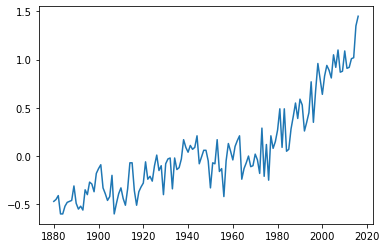

In [6]:
pyplot.plot(year, temp_anomaly);

Now we have a plot but if I give you this plot without any information you would not be able to figure out what kind of data it is! We need labels on the axis, a title and why not a better color, font and size of the ticks. 
**Publication quality** plots should always be your standard for plotting. 
How you present your data will allow others (and probably you in the future) to better understand your work. 

Let's make the font of a specific size and type. 
We don't want to write this out every time we create a plot. 
Instead, the next few lines of code will apply for all the plots we create from now on.

In [6]:
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

We are going to plot the same plot as before but now we will add a few things to make it prettier and **publication quality**.

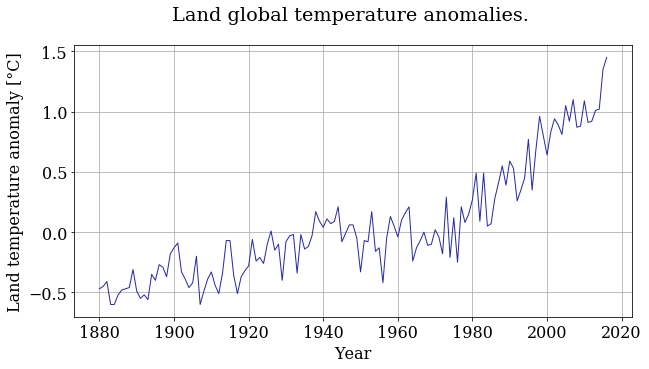

In [7]:
#You can set the size of the figure by doing:
pyplot.figure(figsize=(10,5))

#Plotting
pyplot.plot(year, temp_anomaly, color='#2929a3', linestyle='-', linewidth=1) 
pyplot.title('Land global temperature anomalies. \n')
pyplot.xlabel('Year')
pyplot.ylabel('Land temperature anomaly [°C]')
pyplot.grid();

Better ah? Feel free to play around with the parameters and see how it changes. 

## Step 3: Apply regression

Let's now fit a straight line through the temperature-anomaly data, to see the trends. We need to perform a least-squares linear regression to find the slope and intercept of a line 

$$y = mx+b$$

that fits our data. Thankfully, Python and NumPy are here to help! With [`polyfit()`](https://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.polyfit.html), we get the slope and y-intercept of the line that best fits the data. With [`poly1d()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.poly1d.html), we can build the linear function from its slope and y-intercept.

In [8]:
m, b = numpy.polyfit(year, temp_anomaly, 1)

f_linear = numpy.poly1d((m, b)) 

In [9]:
print(f_linear)

 
0.01037 x - 20.15


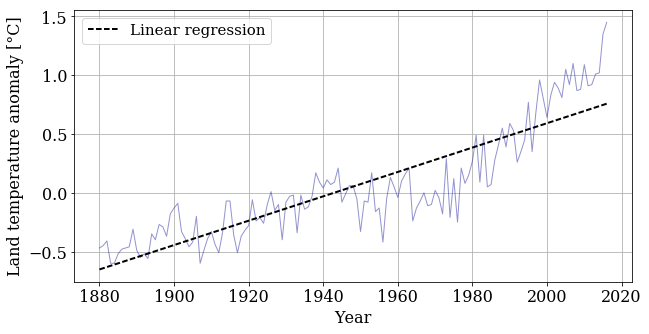

In [10]:
pyplot.figure(figsize=(10, 5))

pyplot.plot(year, temp_anomaly, color='#2929a3', linestyle='-', linewidth=1, alpha=0.5) 
pyplot.plot(year, f_linear(year), 'k--', linewidth=2, label='Linear regression')
pyplot.xlabel('Year')
pyplot.ylabel('Land temperature anomaly [°C]')
pyplot.legend(loc='best', fontsize=15)
pyplot.grid();

## Split regression

We have the linear function that best fits our data but this doesn't look like a good approximation. If you look at the plot you might have noticed that around 1970 the data temperature starts increasing faster. 

What if we break the data in two (before and after 1970) and we do a liear regression in each segment? To do that, we need to find in which position of our `year` array is the year 1970 located. Thanksfully, `numpy` has a function called  [`numpy.where()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.where.html) that can help us. We need to pass a condition and `numpy.where` will tells us where in the array the condition is `True`. 


In [11]:
numpy.where(year==1970)

(array([90]),)

To split the data, we can use a powerful instrument: the colon notation. A colon between two indices indicates a range of values from a start to an end. The rule is that `[start:end]` includes the element at index `start` but excludes the one at index `end`. For example, to grab the first 3 years in our `year` array, we do:

In [12]:
year[0:3]

array([ 1880.,  1881.,  1882.])

Now we know how to split our data in two sets, to get two regression lines

In [13]:
year_1 , temp_anomaly_1 = year[0:90], temp_anomaly[0:90]
year_2 , temp_anomaly_2 = year[90:], temp_anomaly[90:]

m1, b1 = numpy.polyfit(year_1, temp_anomaly_1, 1)
m2, b2 = numpy.polyfit(year_2, temp_anomaly_2, 1)

f_linear_1 = numpy.poly1d((m1, b1))
f_linear_2 = numpy.poly1d((m2, b2))



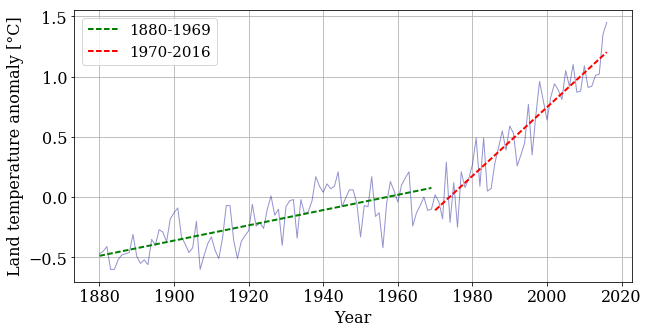

In [14]:
pyplot.figure(figsize=(10, 5))

pyplot.plot(year, temp_anomaly, color='#2929a3', linestyle='-', linewidth=1, alpha=0.5) 
pyplot.plot(year_1, f_linear_1(year_1), 'g--', linewidth=2, label='1880-1969')
pyplot.plot(year_2, f_linear_2(year_2), 'r--', linewidth=2, label='1970-2016')

pyplot.xlabel('Year')
pyplot.ylabel('Land temperature anomaly [°C]')
pyplot.legend(loc='best', fontsize=15)
pyplot.grid();

## We learned:

* applying linear regression to data
* making our plots more beautiful
* accessing chunks of an array
* The Earth is warming up!!!
